# Exploration - Sales Performance 

### Objectives:
- Understand and visualize factors contributing to buyer decision making

---
## <u>Installations

In [1]:
# INSTALLATIONS
# !pip install pandas
# !pip install openpyxl
# !pip install seaborn
# !pip install numpy
# !pip install PyQt5
# !pip install collections

---
## <u>Imports of Libraries</u>
- imports separated for each step along the way

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import time
from PyQt5.QtWidgets import QApplication, QFileDialog
from collections import defaultdict

---
## <u>Reading File Into Project</u>
- taking into account for both 'xlsx' and 'csv' files

In [3]:
def grab_file():
    app = QApplication([])
    file_path, _ = QFileDialog.getOpenFileName(None, 
                                               "Select a CSV or XLSX file", "", 
                                               "Files (*.xlsx *.csv)")
    
    if not file_path:  # If no file is selected
        print("No file selected.")
        return None
    
    if file_path.endswith('.xlsx'):
        print("XLSX file selected. Converting to CSV.")
        df = pd.read_excel(file_path)
        csv_path = file_path.rsplit('.', 1)[0] + '.csv'
        df.to_csv(csv_path, index=False)
        print(f"CSV file created: {csv_path}")
    elif file_path.endswith('.csv'):
        print("CSV file selected. Reading file.")
        csv_path = file_path
        df = pd.read_csv(csv_path)
    else:
        raise ValueError("Unsupported file type selected.")
        
    # Setting options for displaying
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    pd.set_option('display.max_colwidth', None)
    df['Amount'] = df['Amount'] * 0.012
    return df


In [4]:
df = grab_file()

CSV file selected. Reading file.


---
## <u>Grabbing a Row to Look at the Structure of Each Column</u>

In [5]:
df.sample(1)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
112893,403-5830887-2385903,2022-06-11,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-XS,Set,XS,B0894WW15B,Shipped,1,INR,7.968,Dombivli,MAHARASHTRA,421201.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,0.0


---
## <u>Basic Information of the Dataset</u>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128975 non-null  object 
 1   Date                128975 non-null  object 
 2   Status              128975 non-null  object 
 3   Fulfilment          128975 non-null  object 
 4   Sales Channel       128975 non-null  object 
 5   ship-service-level  128975 non-null  object 
 6   Style               128975 non-null  object 
 7   SKU                 128975 non-null  object 
 8   Category            128975 non-null  object 
 9   Size                128975 non-null  object 
 10  ASIN                128975 non-null  object 
 11  Courier Status      122103 non-null  object 
 12  Qty                 128975 non-null  int64  
 13  currency            121180 non-null  object 
 14  Amount              121180 non-null  float64
 15  ship-city           128942 non-nul

---
## <u>Basic Statistics of the Dataset</u>

In [7]:
df.describe()

,Qty,Amount,ship-postal-code,Unnamed: 22
count,128975.000000,121180.000000,128942.000000,79925.0
mean,0.904431,7.782738,463966.236509,0.0
std,0.313354,3.374540,191476.764941,0.0
min,0.000000,0.000000,110001.000000,0.0
25%,1.000000,5.388000,382421.000000,0.0
50%,1.000000,7.260000,500033.000000,0.0
75%,1.000000,9.456000,600024.000000,0.0
max,15.000000,67.008000,989898.000000,0.0


---
## <u>Counting Unique Values</u>
- Counting the unique values of the categorical variables to see if there is features displaying high cardinality (>10 unqiue feautures)

In [8]:
cat_features = df.select_dtypes(include='object')
cat_features.nunique()

Order ID              120378
Date                      91
Status                    13
Fulfilment                 2
Sales Channel              2
ship-service-level         2
Style                   1377
SKU                     7195
Category                   9
Size                      11
ASIN                    7190
Courier Status             3
currency                   1
ship-city               8955
ship-state                69
ship-country               1
promotion-ids           5787
fulfilled-by               1
dtype: int64

---
## <u>Visualizing Distributions of Sales Amount and Quantities</u>

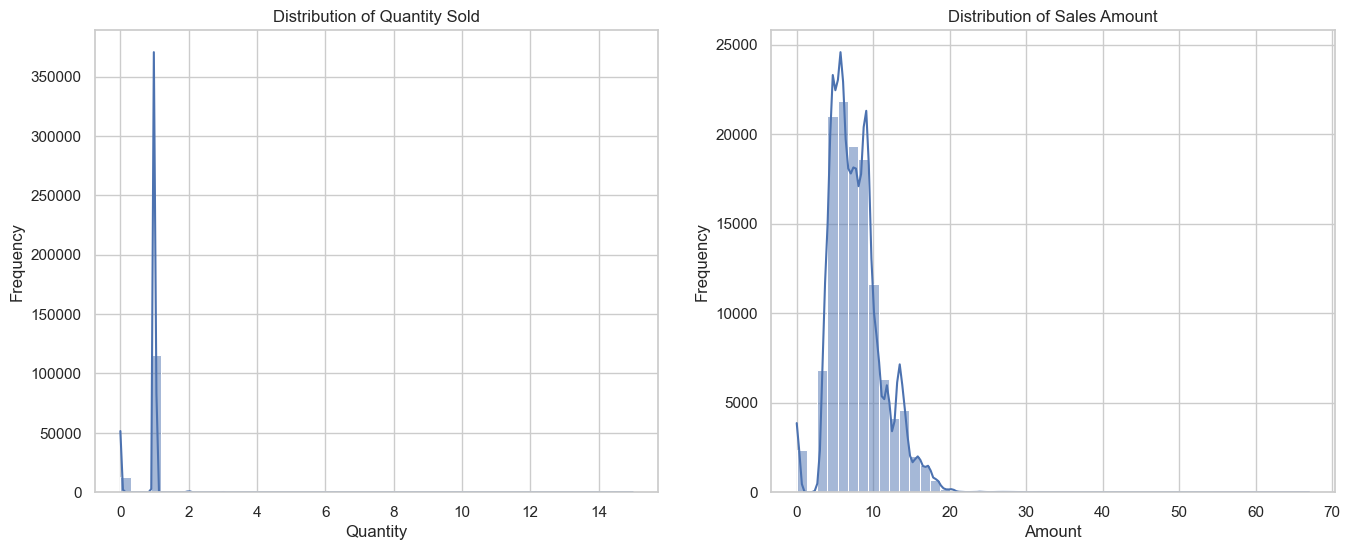

In [9]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Quantity distribution
sns.histplot(df['Qty'], bins=50, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Quantity Sold')
ax[0].set_xlabel('Quantity')
ax[0].set_ylabel('Frequency')

# Amount distribution
sns.histplot(df['Amount'], bins=50, kde=True, ax=ax[1])
ax[1].set_title('Distribution of Sales Amount')
ax[1].set_xlabel('Amount')
ax[1].set_ylabel('Frequency')
plt.show()

---
## <u>Visualizing missing values</u>

<Figure size 640x480 with 0 Axes>

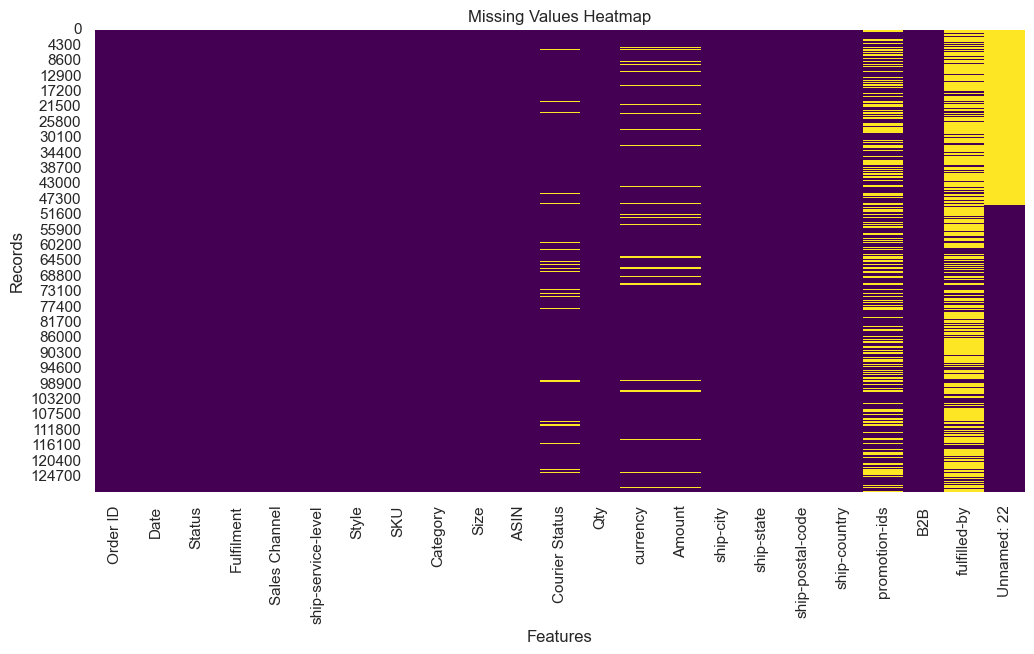

In [10]:
plt.tight_layout()
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title('Missing Values Heatmap')
plt.xlabel('Features')
plt.ylabel('Records')
plt.show()

---
## <u>Generating box plots for Quantity and Amount to identify outliers</u>

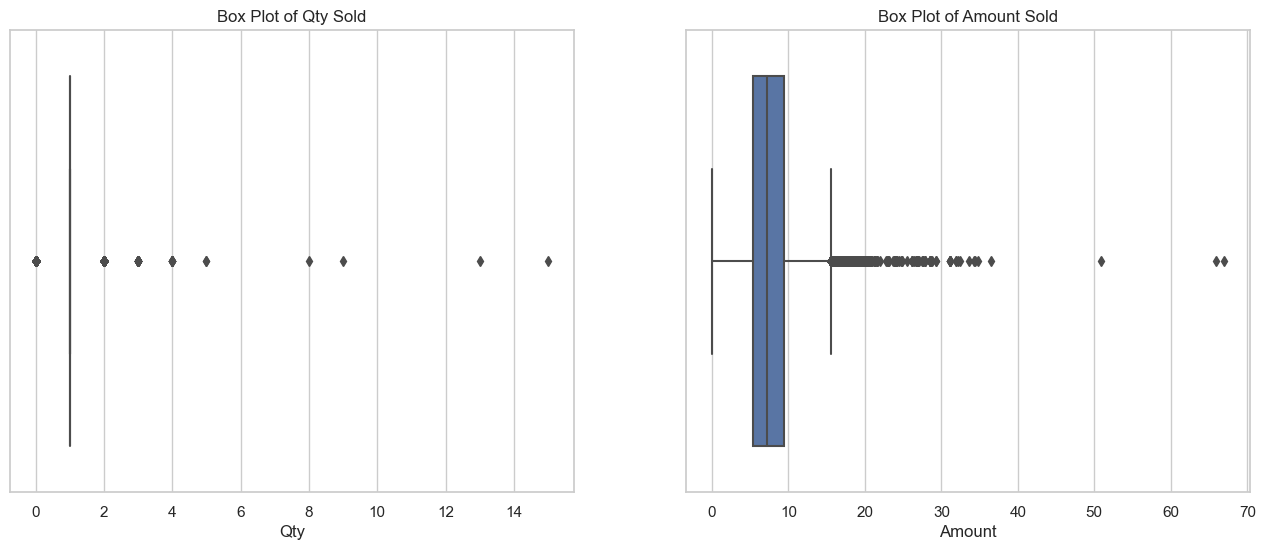

In [11]:
num_cols = ['Qty', 'Amount']
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
count = 0
for col in num_cols:
    sns.boxplot(x=df[col], ax=ax[count])
    ax[count].set_title(f'Box Plot of {col} Sold')
    ax[count].set_xlabel(col)
    count+=1


---
## <u>The Relationship between Product Categories and Sales</u>

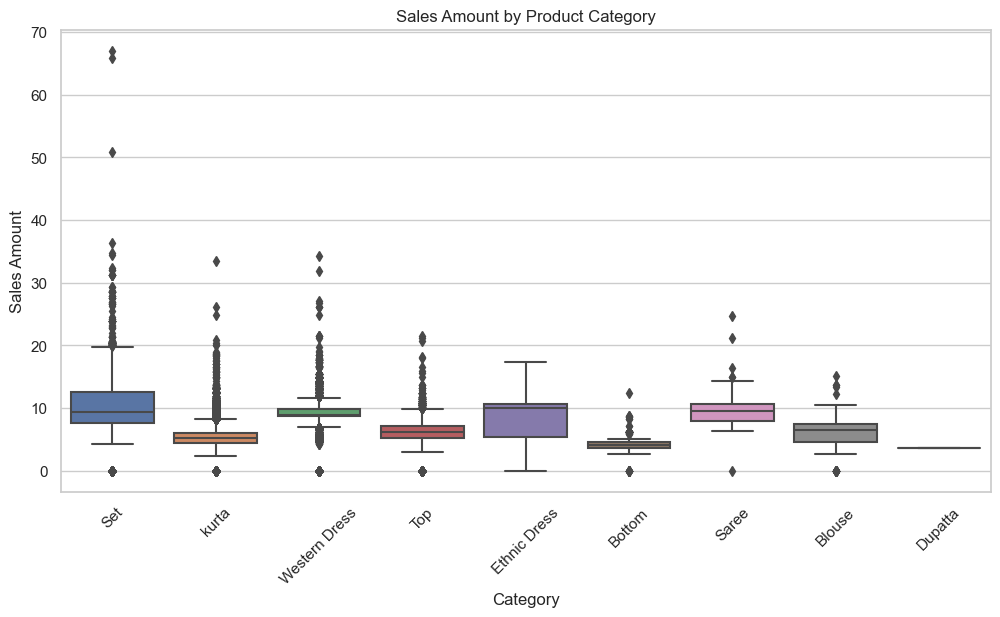

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Amount', data=df)
plt.xticks(rotation=45)
plt.title('Sales Amount by Product Category')
plt.xlabel('Category')
plt.ylabel('Sales Amount')
plt.show()

---
## <u>Examining Impact on Sales Channels</u>

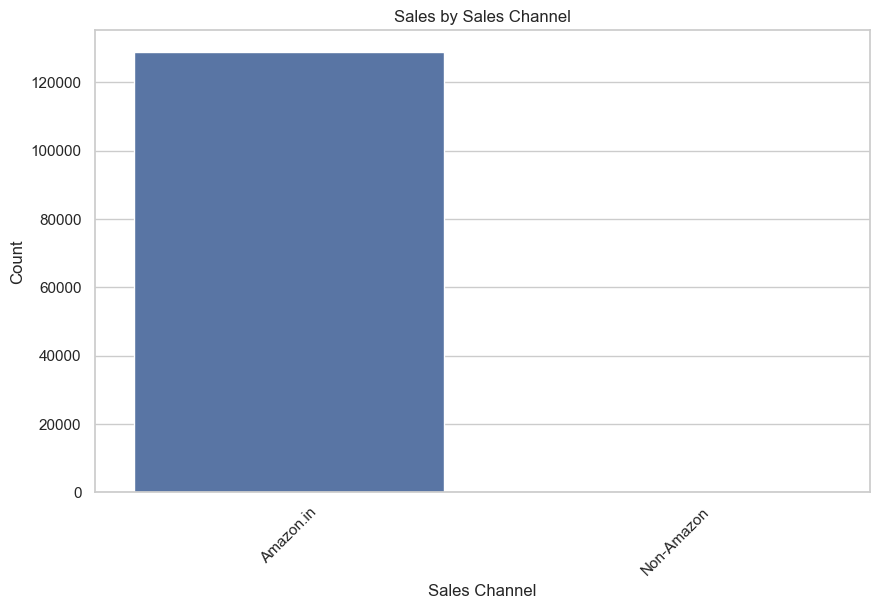

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sales Channel', data=df)
plt.title('Sales by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

---
## <u>Analyzing Quantity by Category for Sales</u>

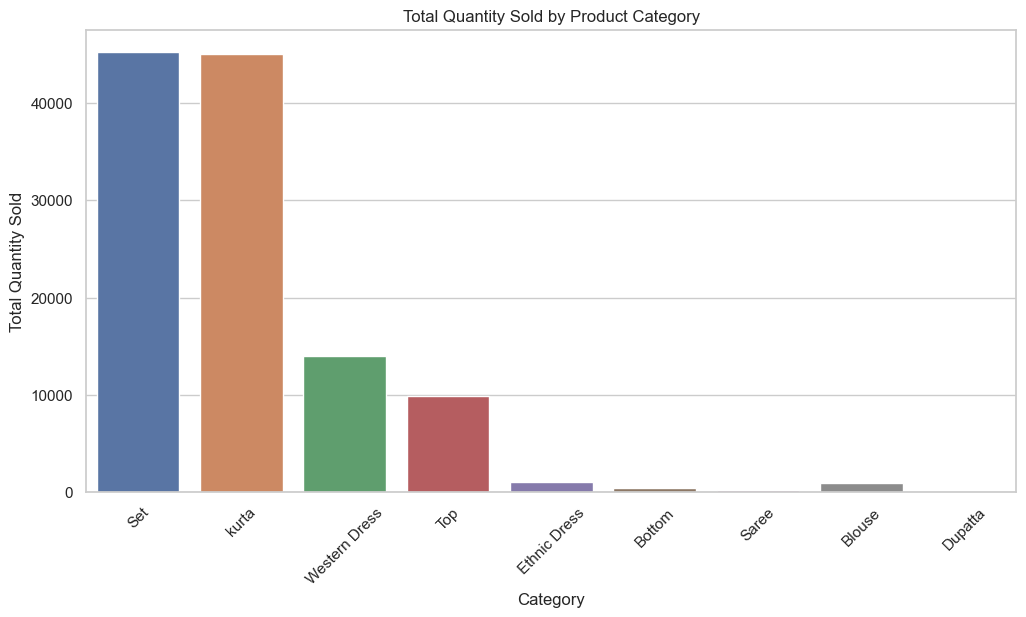

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Qty', data=df, estimator=sum, errorbar=None)
plt.xticks(rotation=45)
plt.title('Total Quantity Sold by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.show()

---
## <u>Relationship between B2B Transactions and Sales Amount

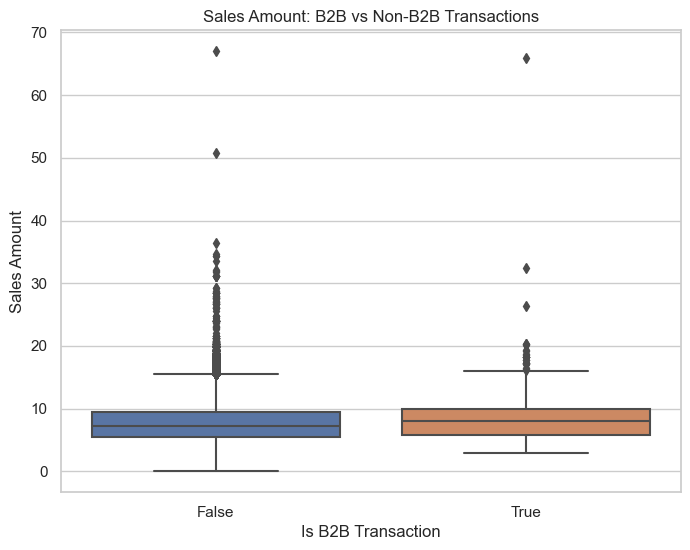

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='B2B', y='Amount', data=df)
plt.title('Sales Amount: B2B vs Non-B2B Transactions')
plt.xlabel('Is B2B Transaction')
plt.ylabel('Sales Amount')
plt.show()

---
## <u>Evaluating Seasonal Trends</u>
- Monthly Sales over time

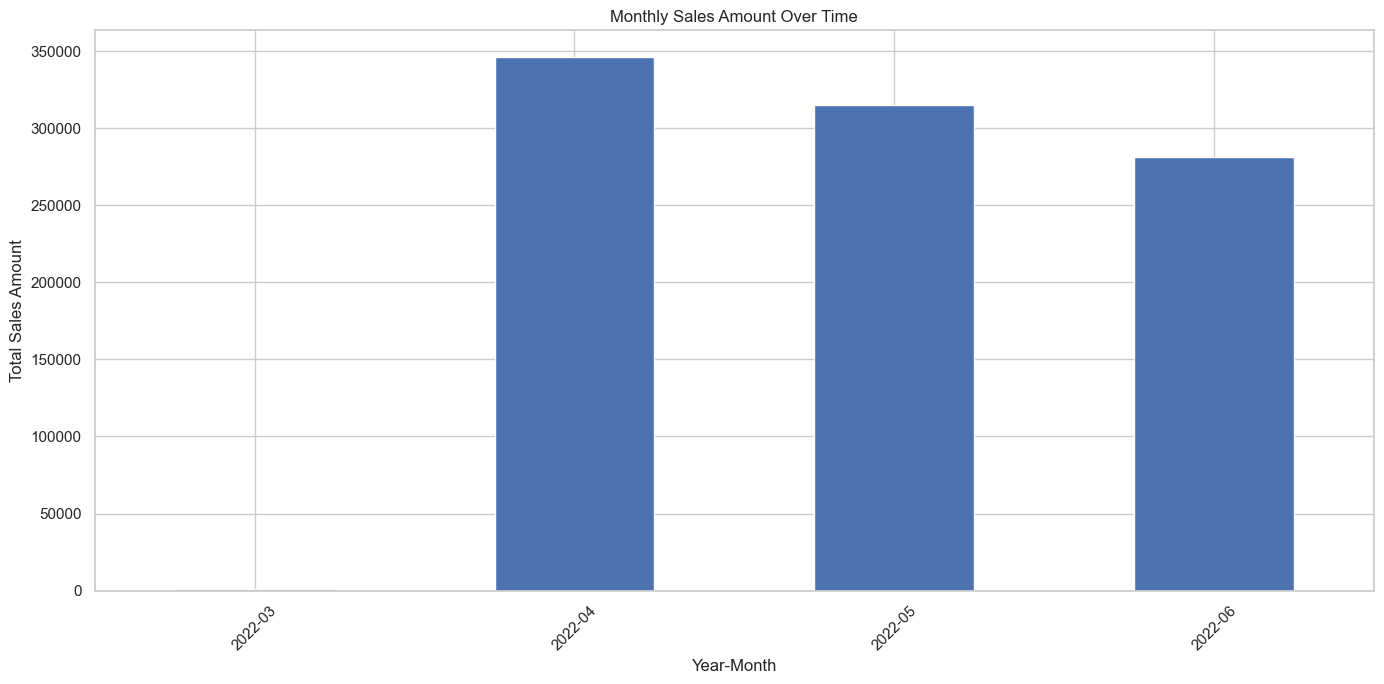

In [16]:
# Convert the 'Date' column to datetime format to facilitate time series analysis
df['Date'] = pd.to_datetime(df['Date'])

# Since we're interested in seasonal trends, let's aggregate sales by month
# First, extract the month and year from the 'Date' for more accurate seasonal analysis
df['Year-Month'] = df['Date'].dt.to_period('M')

# Now, group the data by this new 'Year-Month' column and sum up the 'Amount' to get monthly sales
monthly_sales = df.groupby('Year-Month')['Amount'].sum()

# Plotting the monthly sales to visualize seasonal trends
plt.figure(figsize=(14, 7))
monthly_sales.plot(kind='bar')
plt.title('Monthly Sales Amount Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts plot parameters to give some padding
plt.show()

---
## <u>Checking for Inconsistencies in Categorical Data</u>

In [17]:
for column in df.select_dtypes(include='object').columns:
    print(f"\nUnique values in {column}:\n", df[column].unique())


Unique values in Order ID:
 ['405-8078784-5731545' '171-9198151-1101146' '404-0687676-7273146' ...
 '407-9547469-3152358' '402-6184140-0545956' '408-7436540-8728312']

Unique values in Status:
 ['Cancelled' 'Shipped - Delivered to Buyer' 'Shipped'
 'Shipped - Returned to Seller' 'Shipped - Rejected by Buyer'
 'Shipped - Lost in Transit' 'Shipped - Out for Delivery'
 'Shipped - Returning to Seller' 'Shipped - Picked Up' 'Pending'
 'Pending - Waiting for Pick Up' 'Shipped - Damaged' 'Shipping']

Unique values in Fulfilment:
 ['Merchant' 'Amazon']

Unique values in Sales Channel:
 ['Amazon.in' 'Non-Amazon']

Unique values in ship-service-level:
 ['Standard' 'Expedited']

Unique values in Style:
 ['SET389' 'JNE3781' 'JNE3371' ... 'SET066' 'J0286' 'SET045']

Unique values in SKU:
 ['SET389-KR-NP-S' 'JNE3781-KR-XXXL' 'JNE3371-KR-XL' ... 'JNE3370-KR-S'
 'JNE3678-TU-XXL' 'SET045-KR-NP-M']

Unique values in Category:
 ['Set' 'kurta' 'Western Dress' 'Top' 'Ethnic Dress' 'Bottom' 'Saree'
 'Blous

---
## <u>Checking for Anomalies in Numerical Data</u>

In [18]:
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    negative_values_count = (df[column] <= 0).sum()
    print(f"\nNumber of values that are 0 or negative in {column}:", negative_values_count)


Number of values that are 0 or negative in Qty: 12807

Number of values that are 0 or negative in Amount: 2343

Number of values that are 0 or negative in ship-postal-code: 0

Number of values that are 0 or negative in Unnamed: 22: 79925


---
## <u>Checking for Duplicate Rows</u>

In [19]:
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)


Number of duplicate rows: 6


---
## <u>Product Popularity and Sales Performance</u>
- Summarizing total sales amount by product category

In [20]:
df.groupby('Category')['Amount'].sum().sort_values(ascending=False)

Category
Set              470449.48836
kurta            255594.56040
Western Dress    134592.87228
Top               64173.50760
Ethnic Dress       9494.61192
Blouse             5500.89816
Bottom             1808.01576
Saree              1487.20512
Dupatta              10.98000
Name: Amount, dtype: float64

---
## <u>Impact of Promotions</u>
- Determining if a promotion was applied to an order and analyzing its impact on sales amount

In [21]:
df['HasPromotion'] = ~df['promotion-ids'].isnull()
df.groupby('HasPromotion')['Amount'].mean()

HasPromotion
False    7.195811
True     8.090652
Name: Amount, dtype: float64

---
## <u>Monthly Sales</u>
- Sales for each of the 3 months of customer behavior

In [22]:
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby('Month')['Amount'].sum()
print(round(monthly_sales, 2))

Month
3      1220.21
4    346064.50
5    314717.72
6    281109.71
Name: Amount, dtype: float64
